In [1]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np

results_path = './results/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp
0,graph1,parallelbcsr,0.479104,6.295648,6.774752,20240919154721
1,graph1,parallel,0.238336,1.830208,2.068544,20240919154220
2,graph1,serial,0.006000,0.002000,0.009000,20240919154017
3,graph2,parallelbcsr,0.633152,4.984960,5.618112,20240919154721
4,graph2,parallel,0.204256,1.791104,1.995360,20240919154221
5,graph2,serial,0.005000,0.004000,0.009000,20240919154017
6,graph3b,parallelbcsr,0.396096,5.308576,5.704672,20240919154916
7,graph3b,parallel,0.260096,2.138304,2.398400,20240919154456
8,graph3,parallelbcsr,0.328224,6.648224,6.976448,20240919154722
9,graph3,parallel,0.282624,2.238272,2.520896,20240919154221


In [2]:
agg_results = results.groupby(['graphId', 'algorithm']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,graph1,parallel,0.238336,NaN,0.238336,0.238336,1.830208,NaN,1.830208,1.830208,2.068544,NaN,2.068544,2.068544
1,graph1,parallelbcsr,0.479104,NaN,0.479104,0.479104,6.295648,NaN,6.295648,6.295648,6.774752,NaN,6.774752,6.774752
2,graph1,serial,0.006000,NaN,0.006000,0.006000,0.002000,NaN,0.002000,0.002000,0.009000,NaN,0.009000,0.009000
3,graph2,parallel,0.204256,NaN,0.204256,0.204256,1.791104,NaN,1.791104,1.791104,1.995360,NaN,1.995360,1.995360
4,graph2,parallelbcsr,0.633152,NaN,0.633152,0.633152,4.984960,NaN,4.984960,4.984960,5.618112,NaN,5.618112,5.618112
5,graph2,serial,0.005000,NaN,0.005000,0.005000,0.004000,NaN,0.004000,0.004000,0.009000,NaN,0.009000,0.009000
6,graph3,parallel,0.282624,NaN,0.282624,0.282624,2.238272,NaN,2.238272,2.238272,2.520896,NaN,2.520896,2.520896
7,graph3,parallelbcsr,0.328224,NaN,0.328224,0.328224,6.648224,NaN,6.648224,6.648224,6.976448,NaN,6.976448,6.976448
8,graph3,serial,0.046000,NaN,0.046000,0.046000,8.712000,NaN,8.712000,8.712000,8.759000,NaN,8.759000,8.759000
9,graph3b,parallel,0.260096,NaN,0.260096,0.260096,2.138304,NaN,2.138304,2.138304,2.398400,NaN,2.398400,2.398400


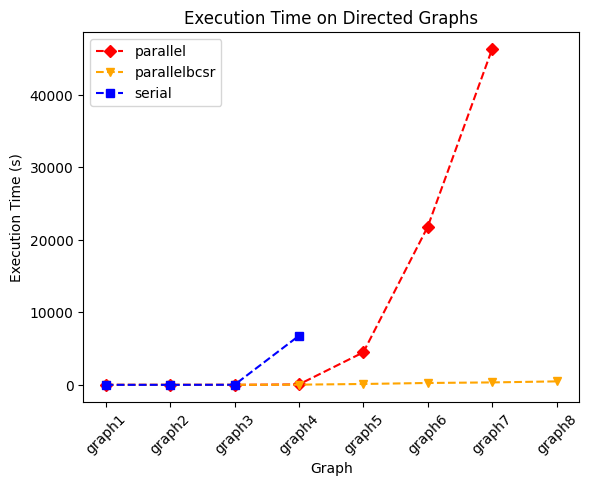

In [3]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsr': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b')
agg_results_directed = agg_results[~agg_results['graphId'].str.endswith('b')]

# Line plot
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(data['graphId'], data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time on Directed Graphs')
plt.legend()
plt.xticks(rotation=45)
plt.show()

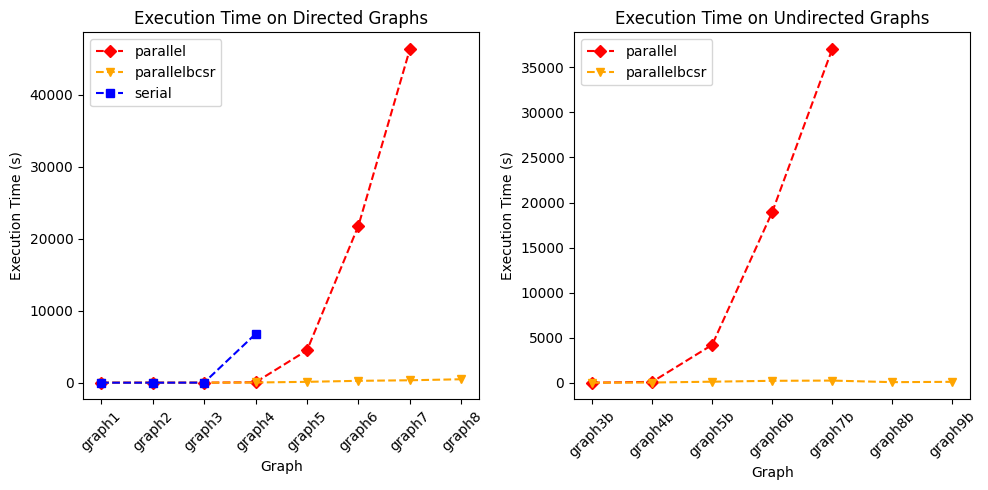

In [4]:
# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and plot execution time for each algorithm on undirected graphs (graphId ends with 'b') 
agg_results_directed = agg_results[~agg_results['graphId'].str.endswith('b')]
agg_results_undirected = agg_results[agg_results['graphId'].str.endswith('b')]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(data['graphId'], data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time on Directed Graphs')
plt.legend()
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
for algorithm in agg_results_undirected['algorithm'].unique():
    data = agg_results_undirected[agg_results_undirected['algorithm'] == algorithm]
    plt.plot(data['graphId'], data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time on Undirected Graphs')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


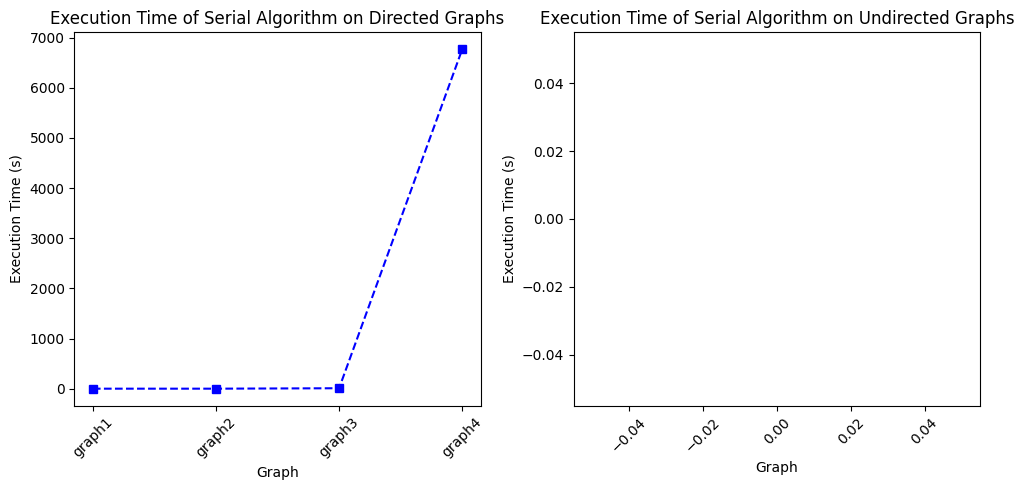

In [11]:
# Plot execution time of serial algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'serial') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'serial') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


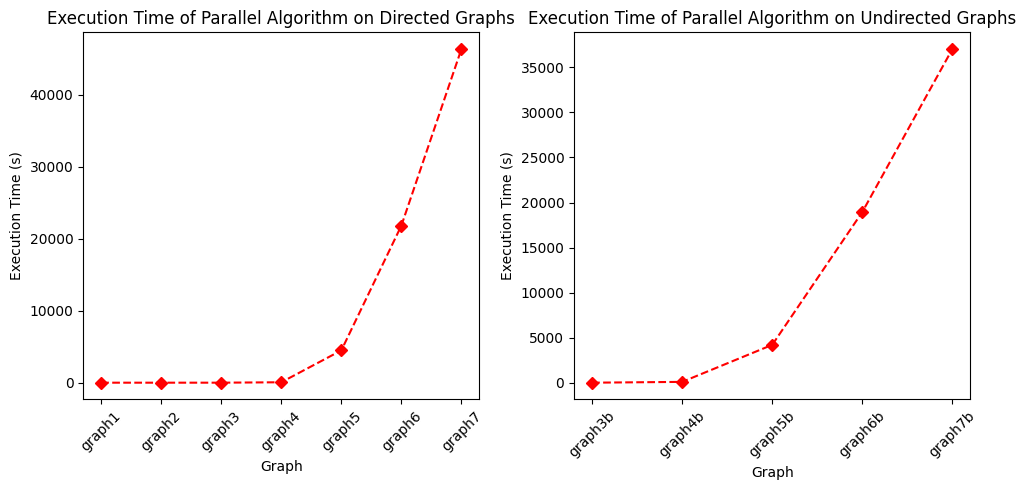

In [14]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallel') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallel') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

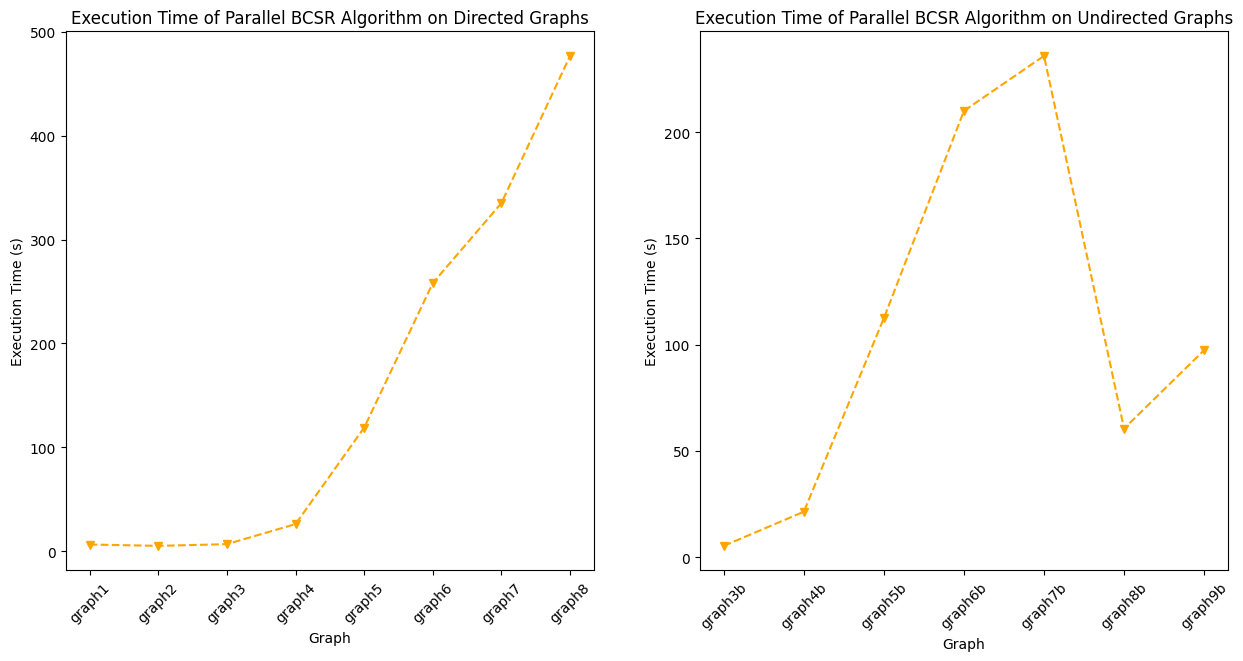

In [19]:
# Plot execution time of parallelbcsr algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.show()